<a href="https://colab.research.google.com/github/anandababugudipudi/TensorFlow-ML/blob/main/3_Core_Learning_Algos_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression using Titanic Dataset**

In [ ]:
# Import the necessary modules
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
# Loading the datasets and preparing Train and Test Datasets
XTrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
XTest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
yTrain = XTrain.pop('survived')
yTest = XTest.pop('survived')

In [ ]:
XTrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
print(XTrain.shape)
print(XTest.shape)

(627, 9)
(264, 9)


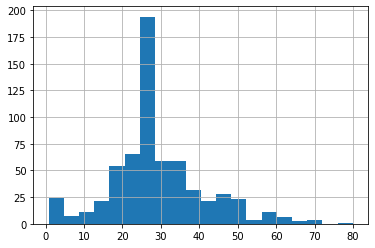

In [ ]:
XTrain.age.hist(bins = 20)

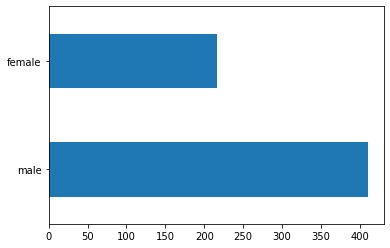

In [ ]:
XTrain.sex.value_counts().plot(kind = 'barh')

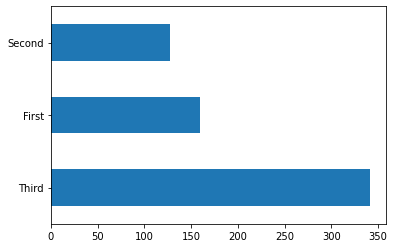

In [ ]:
XTrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% Survive')

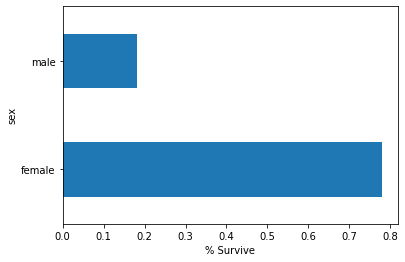

In [ ]:
pd.concat([XTrain, yTrain], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel("% Survive")

In [ ]:
# Converting CATEGORICAL COLUMNS into NUMERICAL COLUMNS
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = XTrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float64))

In [ ]:
# Making input function
def make_input_fn(XTrain, yTrain, num_epochs = 10, shuffle = True, batch_size = 32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(XTrain), yTrain))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [ ]:
# Creating the Training and Testing datasets
train_input_fn = make_input_fn(XTrain, yTrain)
test_input_fn = make_input_fn(XTest, yTest, num_epochs = 1, shuffle = False)

# Creating the model
model = tf.estimator.LinearClassifier(feature_columns = feature_columns)

# Training the model
model.train(train_input_fn)

# Evaluating the model
result = model.evaluate(test_input_fn)

# Printing the results
clear_output()
print(f" The accuracy of the model is {round(result['accuracy']*100, 2)}")

 The accuracy of the model is 74.62


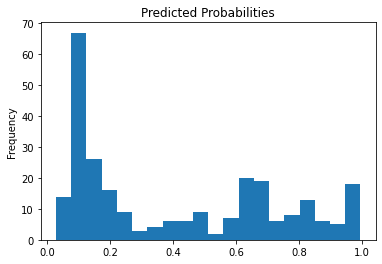

In [ ]:
# Predicting the model
predictions = list(model.predict(test_input_fn))
clear_output()
probs = pd.Series([pred['probabilities'][1] for pred in predictions])
probs.plot(kind = 'hist', bins = 20, title = 'Predicted Probabilities')